<a href="https://colab.research.google.com/github/EvgenieLebedev/deep-learning-methods/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_2_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1. Нейросеть для California housing

Будем работать с набором данным `fetch_california_housing` из `sklearn`.

In [17]:
from sklearn.datasets import fetch_california_housing
import pandas as pd


data = fetch_california_housing(as_frame=True)

X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Виузальное представление табличных данных

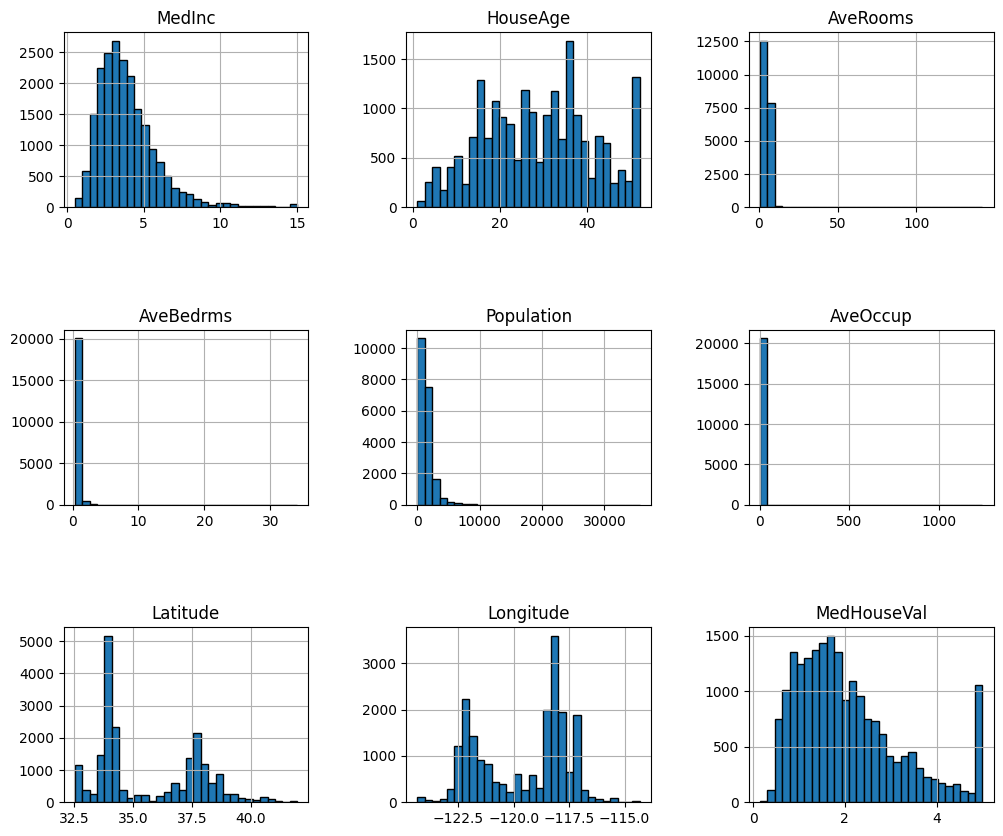

In [18]:
import matplotlib.pyplot as plt

data.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

## 1.1. Разбейте данные на обучение и тест

In [19]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.1, random_state=123)

#нормируем данные по формуле (Хi-M[x])/СКО , где M[x]-мат. ожидание СКО- средняя квадратическая ошибка
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18576, 8), (2064, 8), (18576,), (2064,))

## 1.2. Создайте архитектуру для этой задачи

In [20]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(128, input_shape=(8, ), activation='relu', name='dense_1'))
model.add(Dense(64, activation='relu', name='dense_2'))
model.add(Dense(1, activation='linear', name='dense_output'))


## 1.3. Скомпилируйте сеть
Подберите нужную функцию потерь и метрику. Оптимизатор можете использовать 'sgd'

In [21]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1152      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_output (Dense)         (None, 1)                 65        
Total params: 9,473
Trainable params: 9,473
Non-trainable params: 0
_________________________________________________________________


## 1.4. Обучите нейросеть
Выберите нужное количество эпох.

In [22]:
history = model.fit(X_train, y_train, epochs=25, validation_split=0.05)

Epoch 1/25
552/552 [==============================] - 2s 4ms/step - loss: 0.6147 - mae: 0.5405 - val_loss: 0.4618 - val_mae: 0.4678
Epoch 2/25
552/552 [==============================] - 2s 4ms/step - loss: 0.3756 - mae: 0.4345 - val_loss: 0.4568 - val_mae: 0.4625
Epoch 3/25
552/552 [==============================] - 2s 4ms/step - loss: 0.3539 - mae: 0.4187 - val_loss: 1.9479 - val_mae: 0.4550
Epoch 4/25
552/552 [==============================] - 2s 4ms/step - loss: 0.3466 - mae: 0.4073 - val_loss: 0.8697 - val_mae: 0.4177
Epoch 5/25
552/552 [==============================] - 2s 4ms/step - loss: 0.3212 - mae: 0.3946 - val_loss: 0.3165 - val_mae: 0.4058
Epoch 6/25
552/552 [==============================] - 2s 4ms/step - loss: 0.3072 - mae: 0.3852 - val_loss: 0.3737 - val_mae: 0.4197
Epoch 7/25
552/552 [==============================] - 2s 4ms/step - loss: 0.3035 - mae: 0.3829 - val_loss: 0.3861 - val_mae: 0.3916
Epoch 8/25
552/552 [==============================] - 2s 4ms/step - loss: 0.

1.5. Сделайте вывод, хорошо ли модель обучается?
Если модель обучается плохо, можете внести изменения в работ

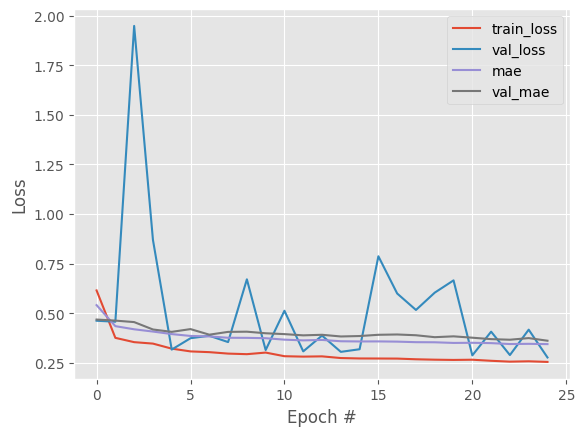

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Графики потерь и точности
N = np.arange(0, 25)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["mae"], label="mae")
plt.plot(N, history.history["val_mae"], label="val_mae")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
_ = plt.legend()

## 1.5  Сеть скорее всего обучается плохо, так как данные не масштабированы.

## 1.6. Сделайте предсказания на тестовых данных

In [27]:
from sklearn.metrics import mean_absolute_error

Xnew = model.predict(X_test)

print(f"Средняя абсолютная ошибка: {int(mean_absolute_error(Xnew, y_test)*100000)}$")

Средняя абсолютная ошибка: 35932$


## 1.7. Посчитайте метрику качества на тестовых данных

In [28]:
mse_nn, mae_nn = model.evaluate(X_test, y_test)

print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)

65/65 [==============================] - 0s 2ms/step - loss: 0.2685 - mae: 0.3593
Mean squared error on test data:  0.2684585154056549
Mean absolute error on test data:  0.3593285381793976


Сравним с моделью линейной регресии

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print('Mean squared error on test data: ', mse_lr)
print('Mean absolute error on test data: ', mae_lr)

Mean squared error on test data:  0.5276834517875308
Mean absolute error on test data:  0.528651656812446


Проверим на той же модели другую нормализацию данных 

In [30]:
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.1, random_state=123)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


Тренируем данные

In [34]:
history = model.fit(X_train, y_train, epochs=50, validation_split=0.1)

Epoch 1/50
523/523 [==============================] - 2s 5ms/step - loss: 0.3140 - mae: 0.3863 - val_loss: 0.3265 - val_mae: 0.3731
Epoch 2/50
523/523 [==============================] - 2s 4ms/step - loss: 0.3120 - mae: 0.3855 - val_loss: 0.3221 - val_mae: 0.3676
Epoch 3/50
523/523 [==============================] - 2s 4ms/step - loss: 0.3131 - mae: 0.3855 - val_loss: 0.3220 - val_mae: 0.3677
Epoch 4/50
523/523 [==============================] - 2s 4ms/step - loss: 0.3115 - mae: 0.3844 - val_loss: 0.3151 - val_mae: 0.3640
Epoch 5/50
523/523 [==============================] - 2s 4ms/step - loss: 0.3077 - mae: 0.3818 - val_loss: 0.4154 - val_mae: 0.4682
Epoch 6/50
523/523 [==============================] - 2s 4ms/step - loss: 0.3088 - mae: 0.3825 - val_loss: 0.3295 - val_mae: 0.3762
Epoch 7/50
523/523 [==============================] - 2s 4ms/step - loss: 0.3006 - mae: 0.3783 - val_loss: 0.3046 - val_mae: 0.3694
Epoch 8/50
523/523 [==============================] - 2s 4ms/step - loss: 0.

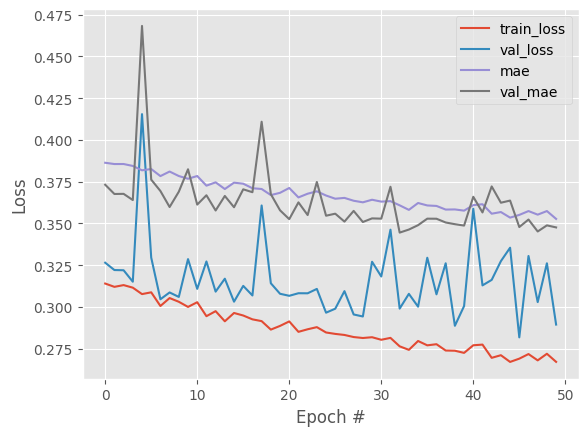

In [37]:
# Графики потерь и точности
N = np.arange(0, 50)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["mae"], label="mae")
plt.plot(N, history.history["val_mae"], label="val_mae")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
_ = plt.legend()

In [38]:
Xnew = model.predict(X_test)

print(f"Средняя абсолютная ошибка: {int(mean_absolute_error(Xnew, y_test)*100000)}$")

Средняя абсолютная ошибка: 56769$


Изменим оптимизатор на AdamAX, установим batch_size = 1000 
Изменим архитетктуру

In [39]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(256, input_shape=(8, ), activation='relu', name='dense_1'))
model.add(Dense(64, activation='relu', name='dense_2'))
model.add(Dense(32, activation='linear', name='dense_3'))
model.add(Dense(1, activation='linear', name='dense_output'))

In [41]:
from tensorflow.keras.optimizers import Adamax
model.compile(optimizer=Adamax(learning_rate=0.05), loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               2304      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_output (Dense)         (None, 1)                 33        
Total params: 20,865
Trainable params: 20,865
Non-trainable params: 0
_________________________________________________________________


In [54]:
history = model.fit(X_train, y_train, epochs=200,batch_size=1000, validation_split=0.1)

Epoch 1/200
17/17 [==============================] - 0s 10ms/step - loss: 0.2883 - mae: 0.3721 - val_loss: 0.3202 - val_mae: 0.3679
Epoch 2/200
17/17 [==============================] - 0s 9ms/step - loss: 0.2839 - mae: 0.3686 - val_loss: 0.3174 - val_mae: 0.3665
Epoch 3/200
17/17 [==============================] - 0s 9ms/step - loss: 0.2794 - mae: 0.3637 - val_loss: 0.3168 - val_mae: 0.3647
Epoch 4/200
17/17 [==============================] - 0s 8ms/step - loss: 0.2742 - mae: 0.3608 - val_loss: 0.3032 - val_mae: 0.3660
Epoch 5/200
17/17 [==============================] - 0s 8ms/step - loss: 0.2883 - mae: 0.3714 - val_loss: 0.3187 - val_mae: 0.3641
Epoch 6/200
17/17 [==============================] - 0s 8ms/step - loss: 0.2871 - mae: 0.3705 - val_loss: 0.3559 - val_mae: 0.4118
Epoch 7/200
17/17 [==============================] - 0s 8ms/step - loss: 0.3044 - mae: 0.3834 - val_loss: 0.3443 - val_mae: 0.3761
Epoch 8/200
17/17 [==============================] - 0s 7ms/step - loss: 0.2948 - 

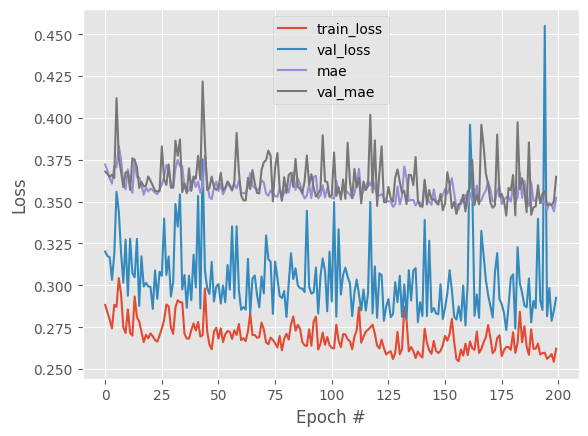

In [56]:
# Графики потерь и точности
N = np.arange(0, 200)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["mae"], label="mae")
plt.plot(N, history.history["val_mae"], label="val_mae")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
_ = plt.legend()

In [57]:
from sklearn.metrics import mean_absolute_error

Xnew = model.predict(X_test)

print(f"Средняя абсолютная ошибка: {int(mean_absolute_error(Xnew, y_test)*100000)}$")

Средняя абсолютная ошибка: 81747$


# Задание 2. Нейронная сеть для классификации изображений

## Обучение нейронной сети для классификации изображений
В качестве датасета взяты покемоны - пикачу, селеби и волтроб (данные получены путём парсинга)

In [58]:
# Подключаем необходимые модули и пакеты
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from tensorflow.keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import random
import pickle
import cv2
import os

## инициализируем данные и метки

In [59]:
print("[INFO] loading images...")
data = []
labels = []

[INFO] loading images...


## Собираем список путей к каждому изображению и перемешиваем их

In [62]:
imagePaths = sorted(list(paths.list_images("./Dataset")))
random.shuffle(imagePaths)
imagePaths[1]

'./Dataset\\voltrob\\000616.jpg'

## Предобработка изобаржений (нормализация и изменение размера)

In [63]:
for imagePath in imagePaths:
	
	image = cv2.imread(imagePath) # загружаем изображение
	image = cv2.resize(image, (32, 32)).flatten() # меняем его разрешение на 32x32 пикселей (без учета соотношения сторон),
																								# сглаживаем его в 32x32x3=3072 пикселей
	data.append(image) # добавляем в список

	label = imagePath.split(os.path.sep)[-2] 	# извлекаем метку класса из пути к изображению (метка класса зависит от имени папки)
	labels.append(label) # обновляем список меток

# масштабируем интенсивности пикселей в диапазон [0, 1] (Нормализация данных)
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

## разбиваем данные на обучающую и тестовую выборки, используя 75%
## данных для обучения и оставшиеся 25% для тестирования

In [64]:
(trainX, testX, trainY, testY) = train_test_split(data,
	labels, test_size=0.25, random_state=42)

## конвертируем метки из целых чисел в векторы 
для 2х классов при бинарной классификации вам следует использовать функцию Keras
 "to_categorical" вместо "LabelBinarizer" из scikit-learn, которая не возвращает вектор

In [65]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

## определим архитектуру 3072-1024-512-3 с помощью Keras

In [66]:
model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(len(lb.classes_), activation="softmax"))


In [70]:
# инициализируем скорость обучения и общее число эпох
INIT_LR = 0.01

print('Количество эпох')
EPOCHS = 500

# компилируем модель, используя SGD как оптимизатор и категориальную
# кросс-энтропию в качестве функции потерь (для бинарной классификации
# следует использовать binary_crossentropy)
print("[INFO] training network...")
opt = SGD(learning_rate =INIT_LR)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

Количество эпох
[INFO] training network...


## Компилируем модель

In [71]:
H = model.fit(trainX, trainY, validation_data=(testX, testY),
	epochs=EPOCHS, batch_size=750)

Epoch 1/500
4/4 [==============================] - 1s 94ms/step - loss: 0.6440 - accuracy: 0.7349 - val_loss: 0.6309 - val_accuracy: 0.7183
Epoch 2/500
4/4 [==============================] - 0s 40ms/step - loss: 0.5977 - accuracy: 0.7607 - val_loss: 0.7408 - val_accuracy: 0.6497
Epoch 3/500
4/4 [==============================] - 0s 31ms/step - loss: 0.6616 - accuracy: 0.7044 - val_loss: 0.6208 - val_accuracy: 0.7259
Epoch 4/500
4/4 [==============================] - 0s 31ms/step - loss: 0.5795 - accuracy: 0.7870 - val_loss: 0.8919 - val_accuracy: 0.6206
Epoch 5/500
4/4 [==============================] - 0s 29ms/step - loss: 0.7000 - accuracy: 0.7264 - val_loss: 0.6258 - val_accuracy: 0.7513
Epoch 6/500
4/4 [==============================] - 0s 18ms/step - loss: 0.5697 - accuracy: 0.7793 - val_loss: 0.6358 - val_accuracy: 0.7322
Epoch 7/500
4/4 [==============================] - 0s 19ms/step - loss: 0.5747 - accuracy: 0.7891 - val_loss: 0.6163 - val_accuracy: 0.7449
Epoch 8/500
4/4 [===

## оцениваем нейросеть

In [72]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      celebi       0.88      0.91      0.90       276
    pickachu       0.96      0.88      0.92       242
     voltrob       0.89      0.92      0.91       270

    accuracy                           0.90       788
   macro avg       0.91      0.90      0.91       788
weighted avg       0.91      0.90      0.91       788



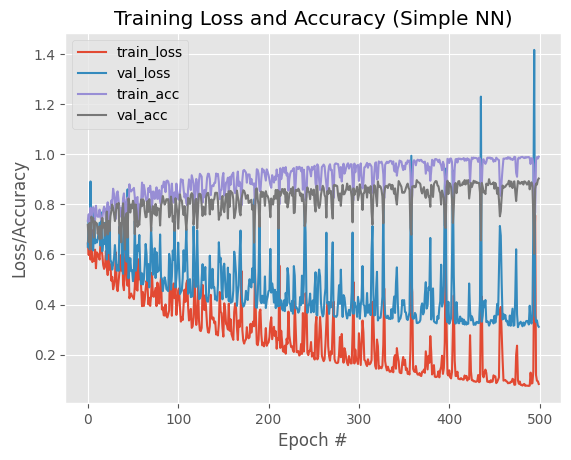

In [73]:
# строим графики потерь и точности
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('plot.png')

In [74]:
# сохраняем модель и метки классов в бинарном представлении на диск
print("[INFO] serializing network and label binarizer...")
model.save("model.h5", save_format="h5")
f = open("label_bin", "wb")
f.write(pickle.dumps(lb))
f.close()

[INFO] serializing network and label binarizer...


## Проверка на внешних данных

In [90]:
# Функция для тестирования модели на пользовательских изображениях
def test_image(imagePath):
  image = cv2.imread(imagePath)
  output = image.copy()
  image = cv2.resize(image, (32, 32))
  image = image.flatten()
  image = image.astype("float") / 255.0
  image = image.reshape((1, image.shape[0]))
  # По модели находим прогноз для загруженного изображения
  preds = model.predict(image)
  print(preds)
  # Выводим прогноз
  i = preds.argmax(axis=1)[0]
  label = lb.classes_[i]
  text = "{}: {:.2f}%".format(label, preds[0][i] * 100)
  _ = cv2.putText(output, text, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.5,
    (0, 0, 255), 2)
  plt.figure()
  plt.axis('off')
  plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))

[[0.02657049 0.95275503 0.02067446]]


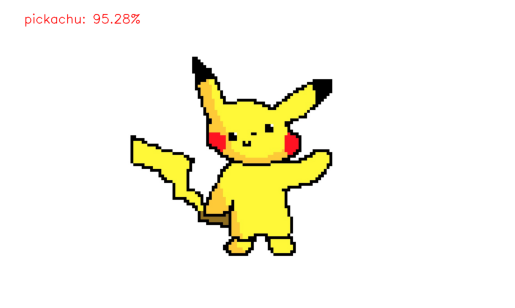

In [91]:
test_image('./test/pickachu.jpg')

[[3.9505678e-01 6.0466349e-01 2.7965795e-04]]


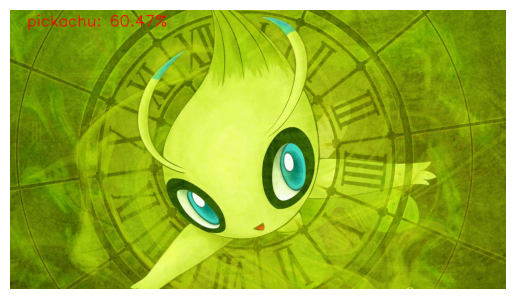

In [92]:
test_image('./test/test_celebi.jpeg')

[[0.01311964 0.04573357 0.9411468 ]]


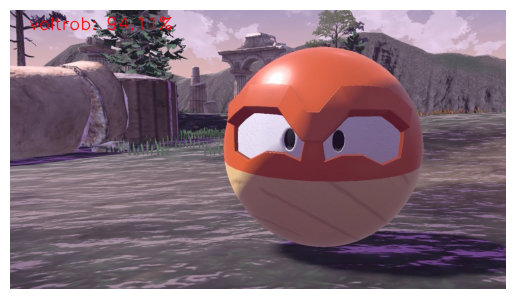

In [93]:
test_image('./test/voltrob.jpg')

[[0.6120048  0.15920277 0.22879235]]


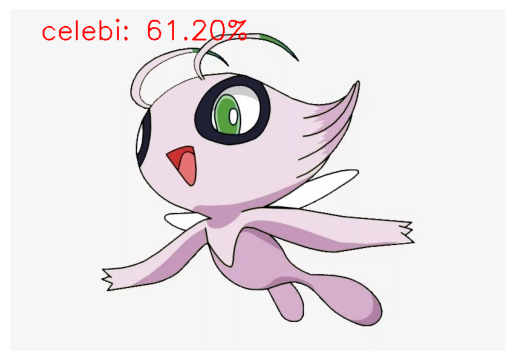

In [94]:
test_image('./test/test_celebi_2.jpeg')

# Выводы

После проверки моедил стало ясно, что модель устойчива к изменению цвета покемона, однако её способны вввести в заблуждение фоновые детали. Также модель показала хорошую устойчивость к эффекту ротации изображения ( в том числе по той причине, что в тестовые данные были поданы перевёрнутые изображения на 90, 180, 270 градусов соотвественно)